### Self-employment and multiple jobholding trends

Updated: May 21, 2018 

Brian Dew, @bd_econ

-----

Originally published on bd econ blog, [here](https://briandew.wordpress.com/2018/06/11/answer-to-gig-economy-question-depends-on-assumptions/)


----

Code below is super messy--will not generate results. I had done this semi-manually, originally.

In [1]:
# Preliminaries--load packages and settings
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
mpl.rc('axes', edgecolor='white') # Hide the axes
plt.rc('axes', axisbelow=True)
import pandas as pd
import numpy as np
import wquantiles

# Recession start and end months, from NBER
rec_dt = [('2001-04-01', '2001-12-01'), ('2008-01-01', '2009-07-01')]

In [3]:
# Functions that get labor force data from the CPS and graph it
def get_cps_data(filters, calc_type, decile=0.5, rtype='share'):
    """Filter the database and calculate labor market stat"""
    data = pd.Series()
    for year in range(1994, 2019):
        d = pd.read_feather(f'data/cps_{year}.ft', nthreads=3)
        for month in range(1, 13):
            df = d[(d['HRMONTH'] == month)]
            if len(df) > 0:
                df = df.query(filters)
                if calc_type == 'selfuninc':
                    seu = np.where(((df['PEIO1COW']==7) | (df['PEIO2COW']==7)), 1, 0)
                    seurt = (df['PWSSWGT'] * seu).sum() / (df['PWSSWGT']).sum()
                    data[pd.to_datetime(f'{year}-{month}-01')] = seurt * 100
                if calc_type == 'mjh':
                    mjh = np.where(df['PRSJMJ']==2, 1, 0)
                    jh = np.where(df['PRSJMJ'].isin([1,2]), 1, 0)
                    mjs = (df['PWSSWGT'] * mjh).sum() / (df['PWSSWGT'] * jh).sum()
                    data[pd.to_datetime(f'{year}-{month}-01')] = mjs * 100

    # Take one-year moving average to smooth out seasonality and noise
    return data.rolling(12).mean().dropna()

def labor_mkt_grapher(title, data, color, decimals=1):
    """Graph the labor market! """
    spcr, spcr2 = (data.max() - data.min()) / 26, (data.max() - data.min()) / 40
    ax = data.plot(title=title, figsize=(8, 4), color=color)
    ax = plt.scatter([data.index[-1]], [data[-1]], color=color, s=25)
    for i, v in rec_dt:
        ax = plt.axvspan(i, v, fill=True, linewidth=0, color='gray', alpha=0.2)
    if decimals == 1:
        ax = plt.annotate(f'   {data[-1]: .1f}%', (data.index[-1], data[-1]-spcr2))
        ax = plt.xlabel('Source: Current Population Survey microdata, 12-month moving average')
    else:
        ax = plt.annotate(f'   ${data[-1]: .2f}', (data.index[-1], data[-1]-spcr2))
        ax = plt.xlabel('Source: Current Population Survey microdata, adjusted for inflation by CPI-U')
    ax = plt.annotate(f'  {data.index[-1]:%b %Y}', (data.index[-1], data[-1]+spcr), 
                      fontweight='bold')

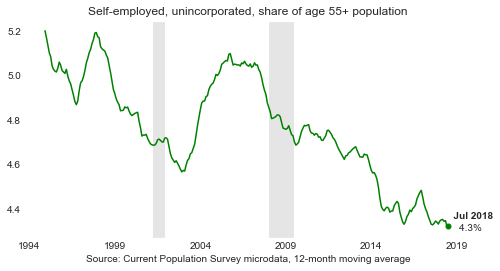

In [6]:
# Self-employed, unincorporated
filters = 'PRTAGE >= 55'
calc_type = 'selfuninc'
title = 'Self-employed, unincorporated, share of age 55+ population'
data = get_cps_data(filters, calc_type)
labor_mkt_grapher(title, data, 'green')

C:\Users\BDew\Anaconda3\lib\site-packages\pandas\io\feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


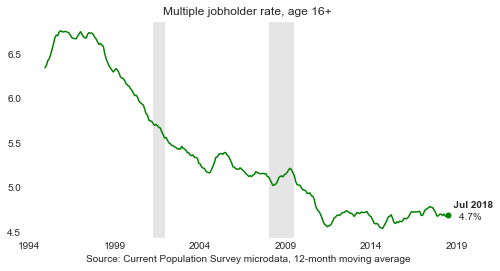

In [7]:
# MJH
filters = 'PRTAGE >= 25 and PRTAGE <= 54 and PESEX==1'
calc_type = 'mjh'
title = 'Multiple jobholder rate, age 16+'
data = get_cps_data(filters, calc_type)
labor_mkt_grapher(title, data, 'green')

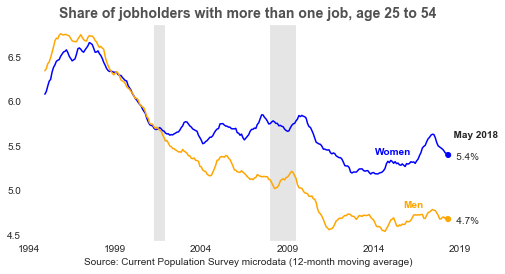

In [100]:
color = ['blue', 'orange']
title = 'Share of jobholders with more than one job, age 25 to 54'
ax = dft.plot(figsize=(8, 4), color=color, legend=False)
ax = plt.scatter([dft.index[-1]] * len(dft.iloc[-1]), [dft.iloc[-1]], color=color, s=25)
for i, v in rec_dt:
    ax = plt.axvspan(i, v, fill=True, linewidth=0, color='gray', alpha=0.2)
    ax = plt.xlabel('Source: Current Population Survey microdata (12-month moving average)')
ax = plt.annotate(f'  {dft.index[-1]:%b %Y}', (dft.index[-1], max(dft.iloc[-1])+0.2), 
                    fontweight='bold')
ax = plt.annotate(f'Women', (dft.index[230], 5.4), color='blue', 
                    fontweight='bold')
ax = plt.annotate(f'Men', (dft.index[250], 4.8), color='orange', 
                    fontweight='bold')
ax = plt.annotate(f'  {dft["women"].iloc[-1]:4.1f}%', (dft.index[-1],dft['women'].iloc[-1]-0.05))
ax = plt.annotate(f'  {dft["men"].iloc[-1]:4.1f}%', (dft.index[-1],dft['men'].iloc[-1]-0.05))
plt.title(title, size=14, weight='bold', alpha=0.8, x=0.5)
plt.savefig('mjh.png', bbox_inches='tight', dpi=250)

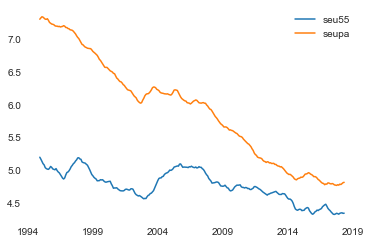

In [39]:
dft.plot()